<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/Kmeans_%26_Hierarchical_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_customers = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv')

In [ ]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Data mnipulation

In [ ]:
#missing values
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#EDA

In [ ]:
mall_customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

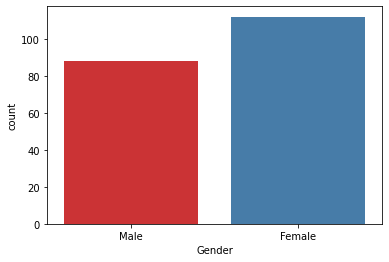

In [ ]:
sns.countplot(x='Gender',data=mall_customers,palette = 'Set1')

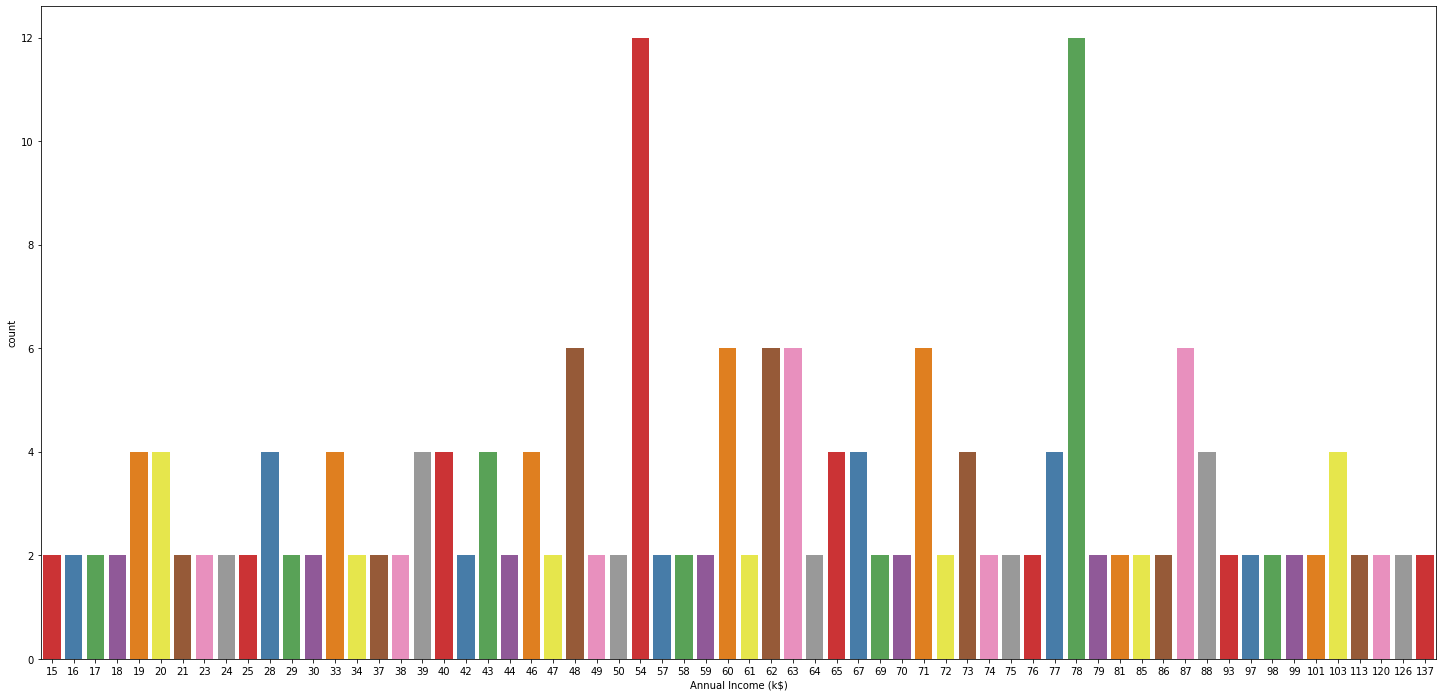

In [ ]:
plt.figure(figsize = (25,12))
sns.countplot(x = 'Annual Income (k$)', data = mall_customers, palette = 'Set1')

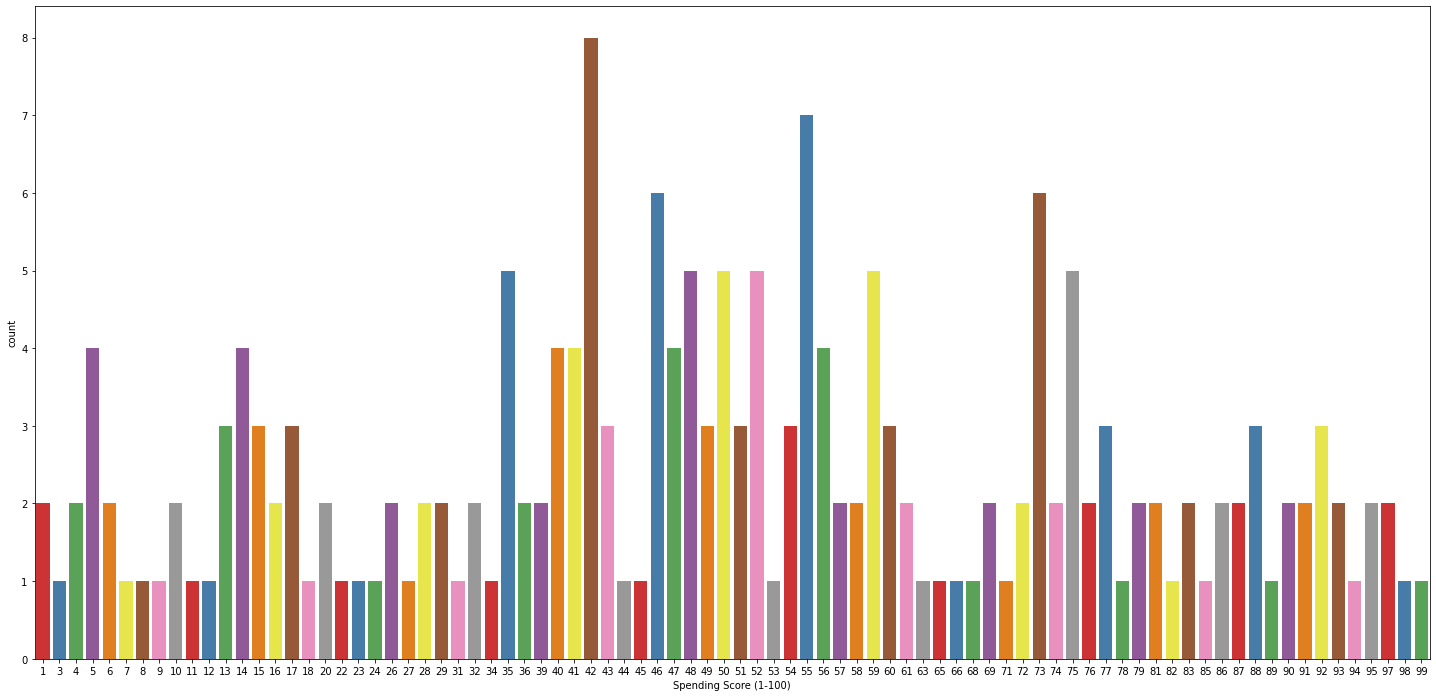

In [ ]:
plt.figure(figsize = (25,12))
sns.countplot(x = 'Spending Score (1-100)', data = mall_customers, palette = 'Set1')

#Features

In [ ]:
X = mall_customers.iloc[:, [3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#Elbow Method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Use elbow method to find optimum number of clusters[WCSS vs K number of Clusters]
wcss = []
for i in range(1, 16):
    # init = k-means++ (method to choose initial cluster data points)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, '')

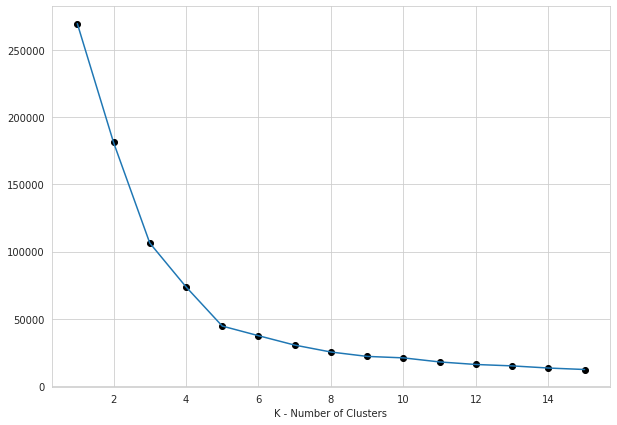

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
plt.plot(range(1, 16), wcss)
plt.scatter(range(1, 16), wcss, marker = 'o', color = 'k')
plt.xlabel('K - Number of Clusters')
plt.ylabel('')

In [ ]:
# n_clusters = No. of Clusters , init = selects intial cluster centres for k-means clustering in smart way to speed up convergence
# max_iter = np. of iterations
# n_init = Number of time k-means algorithm will run with different centroid seeds
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y_clusters = kmeans.predict(X) 
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
# Centroids
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

#Cluster Visualization


In [ ]:
X['Cluster'] = y_clusters

<ipython-input-20-913d6ddec2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = y_clusters


In [ ]:
X

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


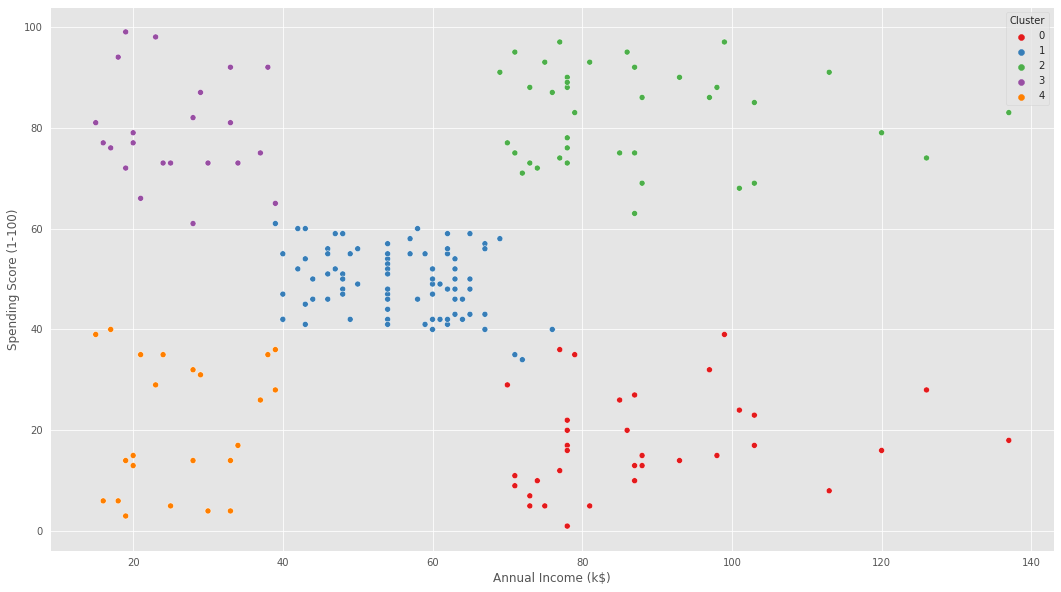

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (18,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = X, palette='Set1')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


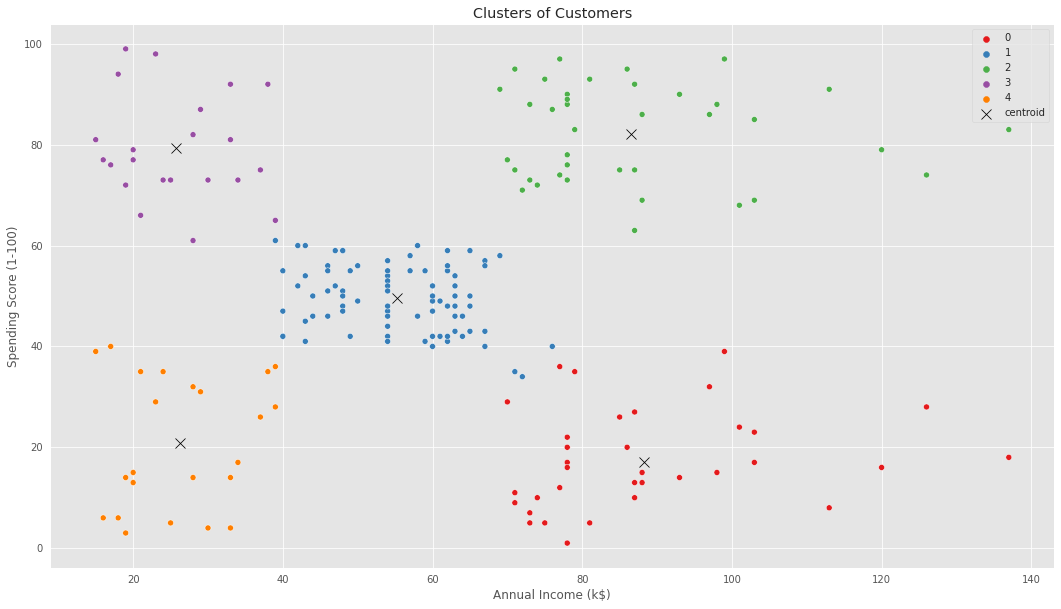

In [ ]:
#in a batter way displaying
plt.style.use('ggplot')
plt.figure(figsize = (18,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = X, palette='Set1')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'black', label = 'centroid',
                s = 100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Hierarchical Clustering

In [ ]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

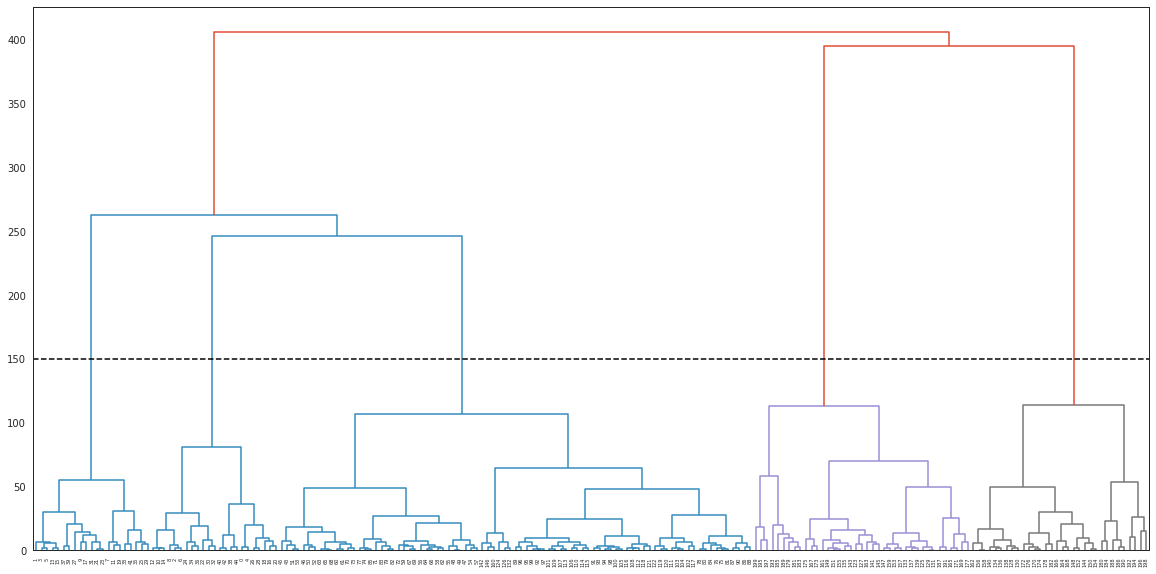

In [ ]:
sns.set_style('white')
fig = plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(150, linestyle = '--', color = 'k')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# linkage = 'single','complete','ward'
hc = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage = 'ward')

In [ ]:
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
y_hc = hc.fit_predict(X)

In [ ]:
X['Cluster'] = y_hc

<ipython-input-30-8ccc7dd00c50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = y_hc


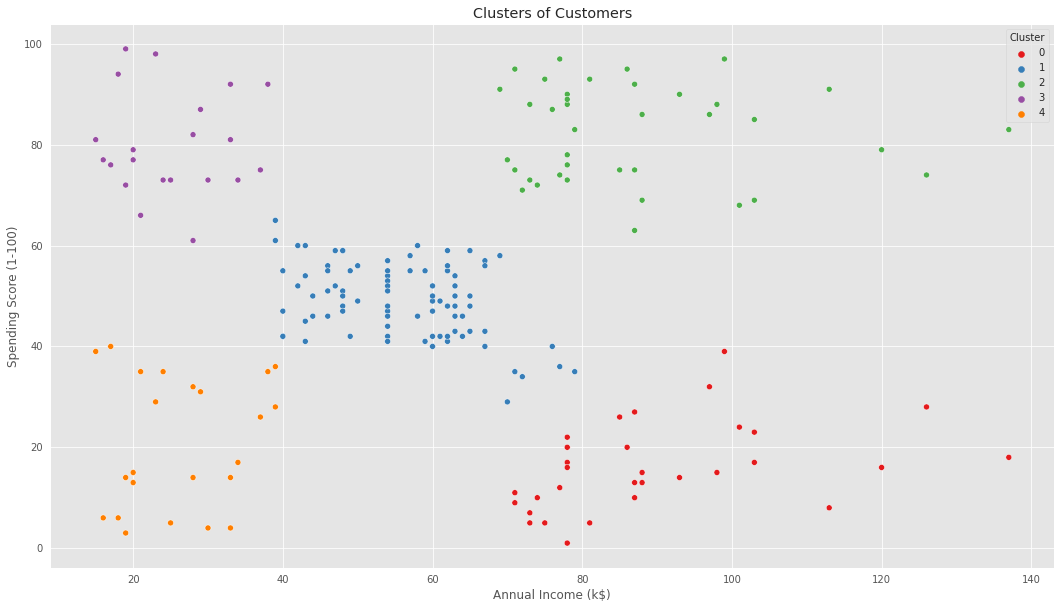

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (18,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = X, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()